# Case Study 1

Nikos Giannakis


In [1]:
import pandas as pd
df = pd.read_csv("loans_full_schema.csv")

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 55)

## Part I Dataset Description

### first 5 lines of dataset

In [135]:
df.head()

emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  delinq_2y  \
0                       NaN                   NaN          0   
1                       NaN                   NaN          0   
2                       NaN                   NaN          0   
3                       NaN                   NaN          0   
4                  Verified                 37.66          0   

   months_since_last_delinq  earliest_credit_line  inquiries_last_12m  \
0                      38.0                  2001                   6   
1                       NaN                  1996                   1   
2                      28.0                  2006                   4   
3                       NaN                  2007                   0   
4                       NaN                  2008                   7   

   total_credit_lines  open_credit_lines  total_credit_limit  \
0                  28                 10               70795   
1                  30                 14               28800   
2                  31                 10               24193   
3                   4                  4               25400   
4                  22                 16               69839   

   total_credit_utilized  num_collections_last_12m  \
0                  38767                         0   
1                   4321                         0   
2                  16000                         0   
3                   4997                         0   
4                  52722                         0   

   num_historical_failed_to_pay  months_since_90d_late  \
0                             0                   38.0   
1                             1                    NaN   
2                             0                   28.0   
3                             1                    NaN   
4                             0                    NaN   

   current_accounts_delinq  total_collection_amount_ever  \
0                        0                          1250   
1                        0                             0   
2                        0                           432   
3                        0                             0   
4                        0                             0   

   current_installment_accounts  accounts_opened_24m  \
0                             2                    5   
1                             0                   11   
2                             1                   13   
3                             1                    1   
4                             1                    6   

   months_since_last_credit_inquiry  num_satisfactory_accounts  \
0                               5.0                         10   
1                               8.0                         14   
2                               7.0                         10   
3                              15.0                          4   
4                               4.0                         16   

   num_accounts_120d_past_due  num_accounts_30d_past_due  \
0                         0.0                          0   
1                         0.0                          0   
2                         0.0            

### Info of Dataset's Variables and dataset shape

In [136]:
print(f"Shape: {df.shape}")

Shape: (10000, 55)


In [137]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

### Missing Values

<AxesSubplot:>

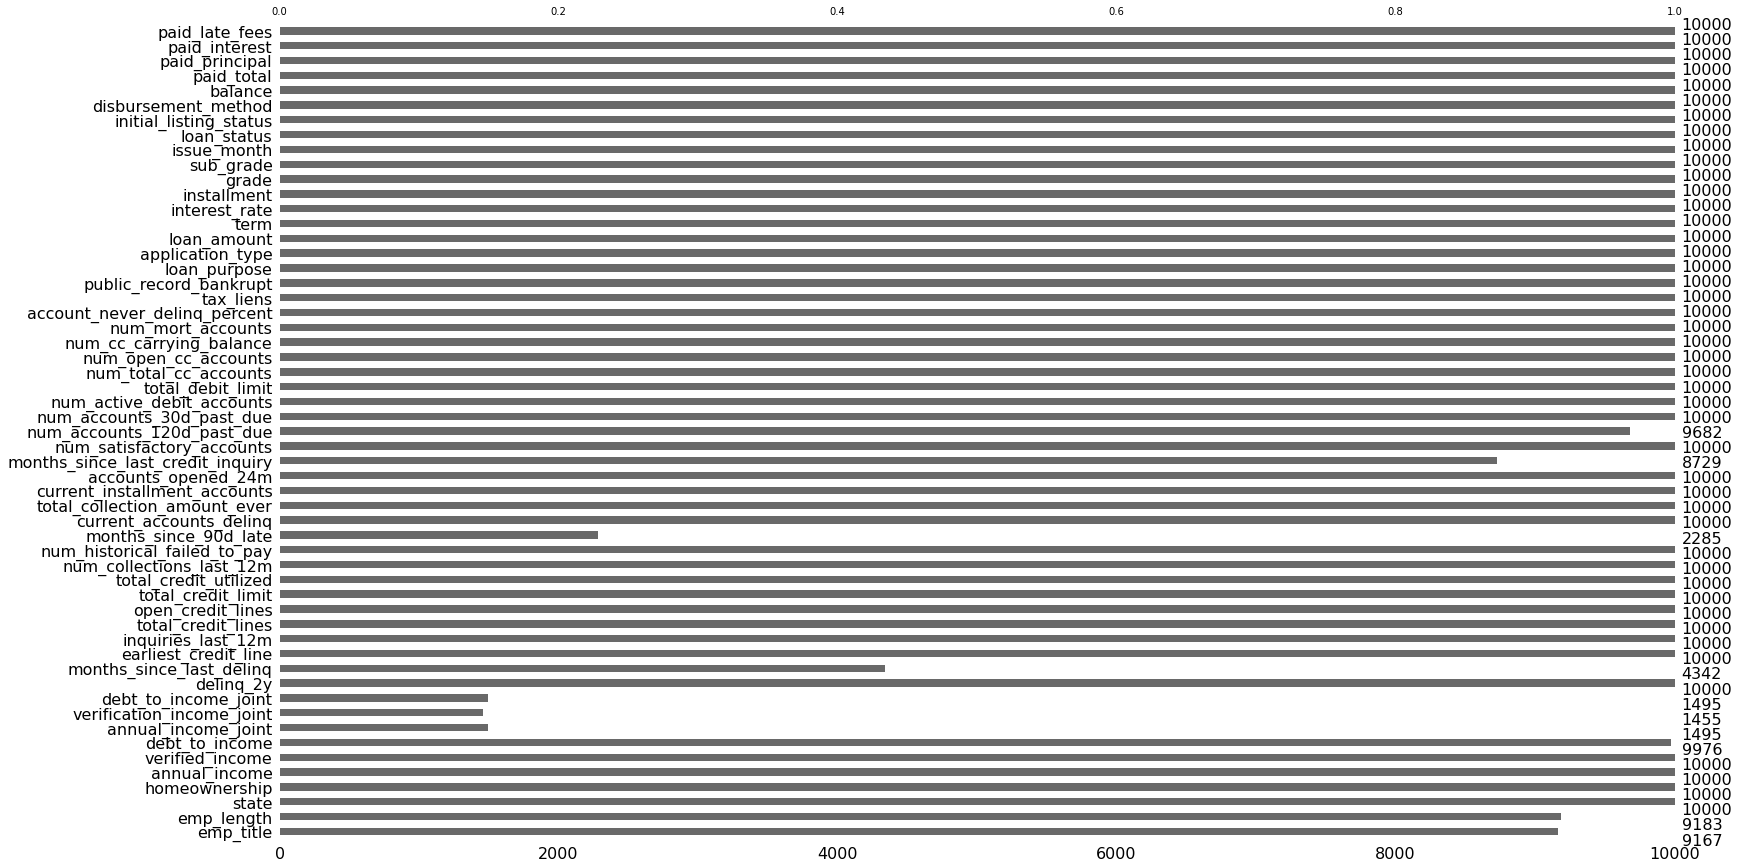

In [9]:
import missingno as msn
msn.bar(df)

### Comments:

- I chose to drop the variables which have more than 50% missing values.

In [2]:
df1 = df.drop(columns=['months_since_90d_late','months_since_last_delinq', 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint'])
print(f"New shape: {df1.shape}")

New shape: (10000, 50)


### Dataset exploration

In [6]:
columns = df1.columns.to_list()

In [3]:
numerical = [ 'emp_length', 'annual_income','debt_to_income','delinq_2y', 'inquiries_last_12m','total_credit_lines','open_credit_lines',
            'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'current_accounts_delinq',
            'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
            'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
            'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt', 'loan_amount', 'term', 'interest_rate',
            'installment','balance', 'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees']
categorical = ['emp_title', 'state', 'homeownership', 'verified_income','loan_purpose','application_type', 'grade', 'sub_grade', 'loan_status','initial_listing_status', 'disbursement_method' ]
years = ['earliest_credit_line', 'issue_month'  ]

In [8]:
print("Correlation between Dependent and Independent Variables")
print(df1.corr()['interest_rate'])

Correlation between Dependent and Independent Variables
emp_length                         -0.029621
annual_income                      -0.099584
debt_to_income                      0.141653
delinq_2y                           0.090456
earliest_credit_line                0.103635
inquiries_last_12m                  0.131193
total_credit_lines                 -0.044435
open_credit_lines                  -0.012773
total_credit_limit                 -0.130497
total_credit_utilized               0.031527
num_collections_last_12m            0.029901
num_historical_failed_to_pay        0.037563
current_accounts_delinq             0.007184
total_collection_amount_ever        0.013532
current_installment_accounts        0.047131
accounts_opened_24m                 0.120657
months_since_last_credit_inquiry   -0.100945
num_satisfactory_accounts          -0.013330
num_accounts_120d_past_due               NaN
num_accounts_30d_past_due           0.007184
num_active_debit_accounts           0.026800

- It seems that the only feature approaching to medium high correlation is paid_interest 


### Boxplots in order to check for outliers

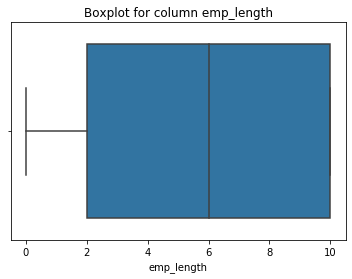

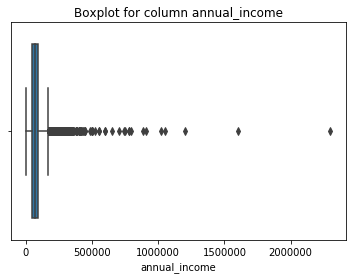

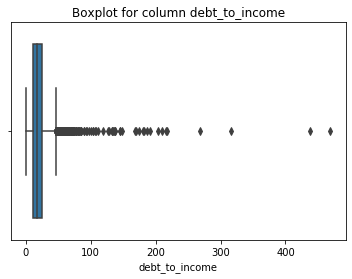

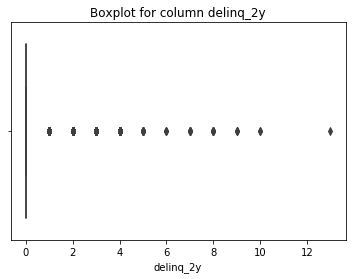

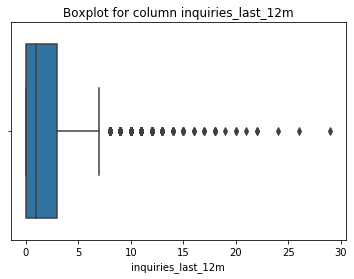

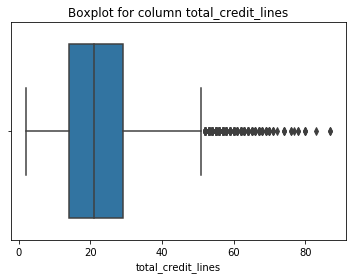

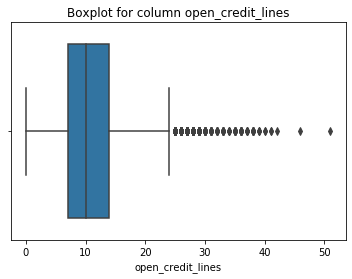

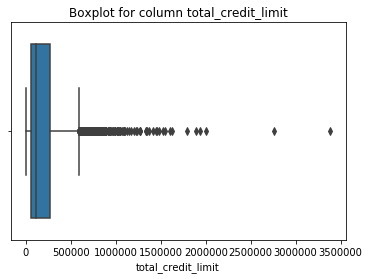

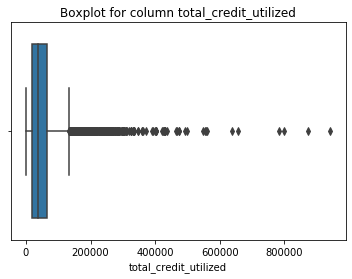

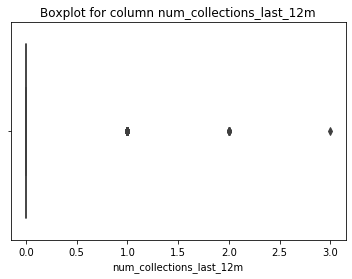

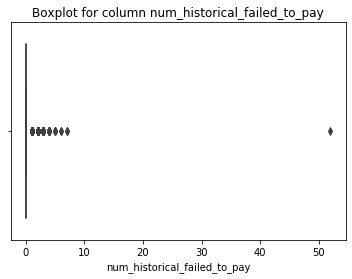

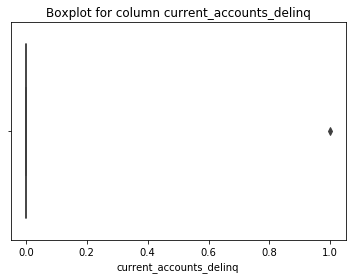

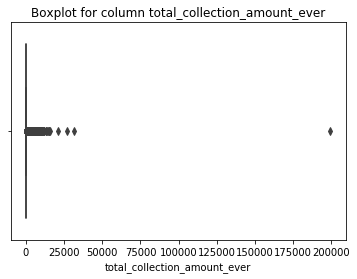

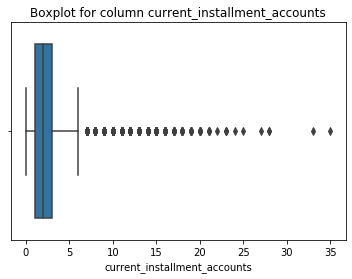

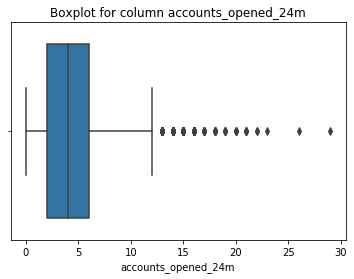

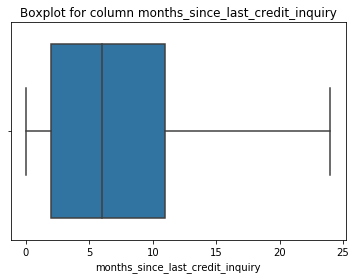

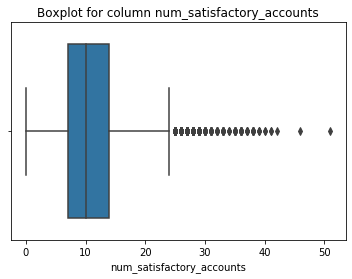

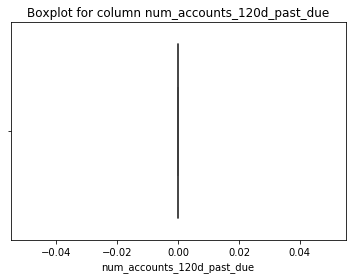

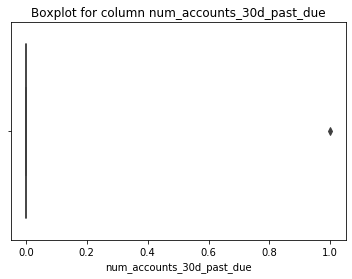

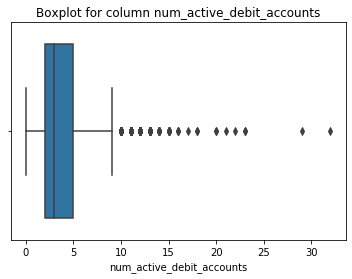

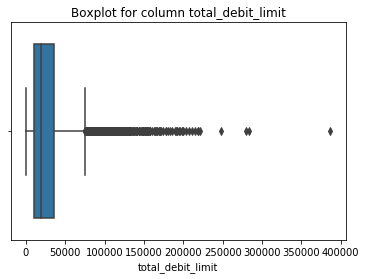

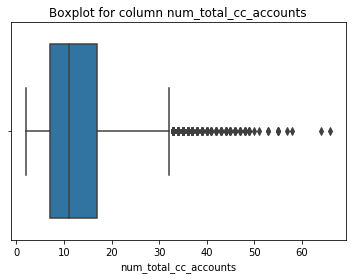

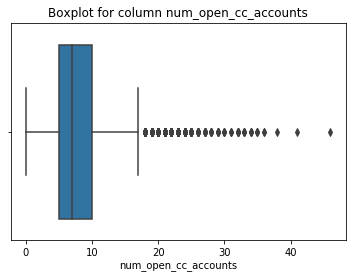

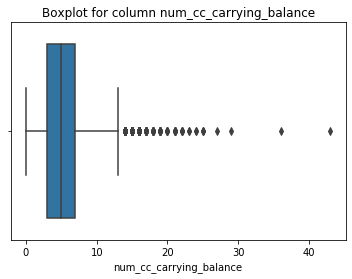

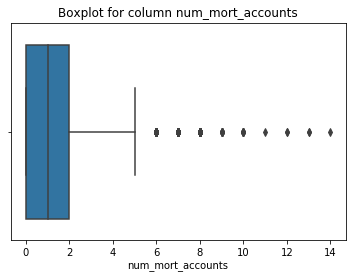

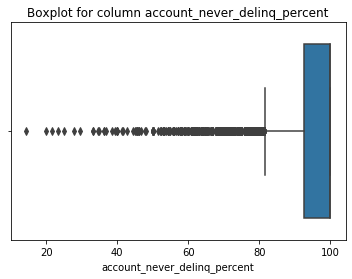

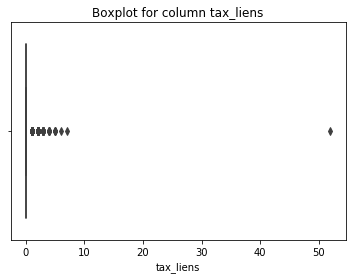

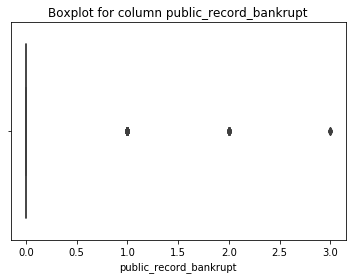

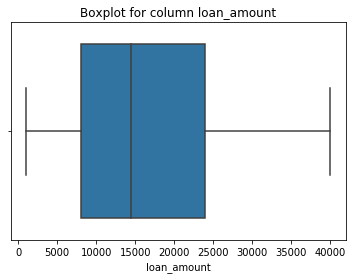

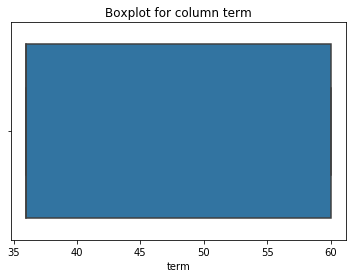

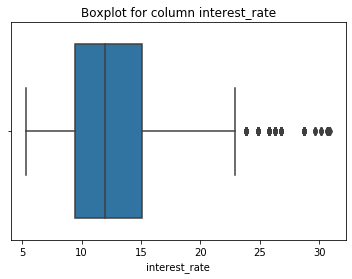

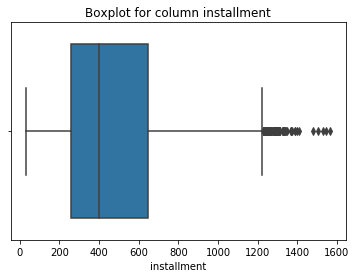

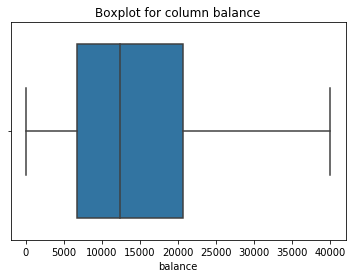

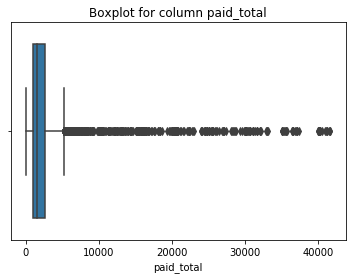

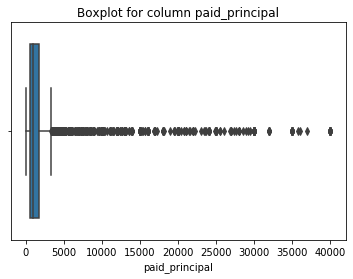

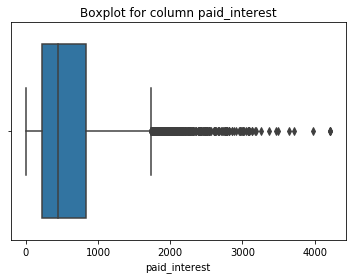

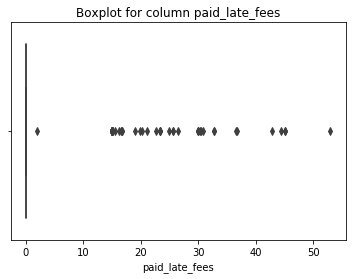

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for col in numerical:
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot for column {col}")
    plt.show()

- It seems that there are some possible outliers. 
- On first sight i chose to keep them inside. 
- If i had more time i would run also the models without having as input data the possible outliers. 

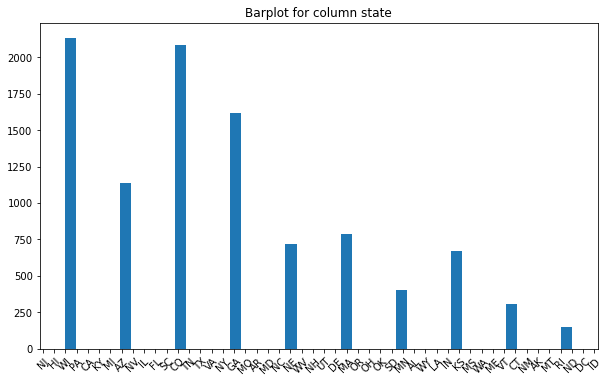

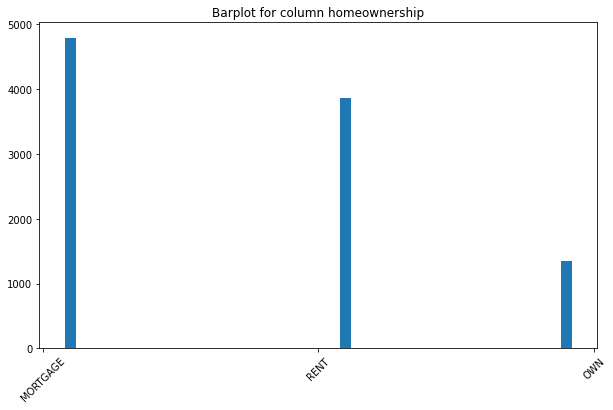

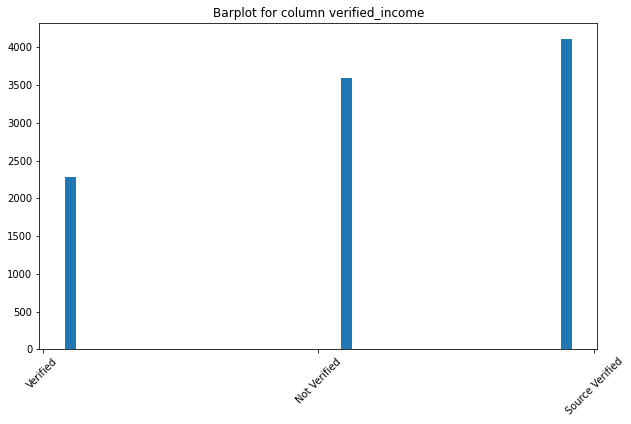

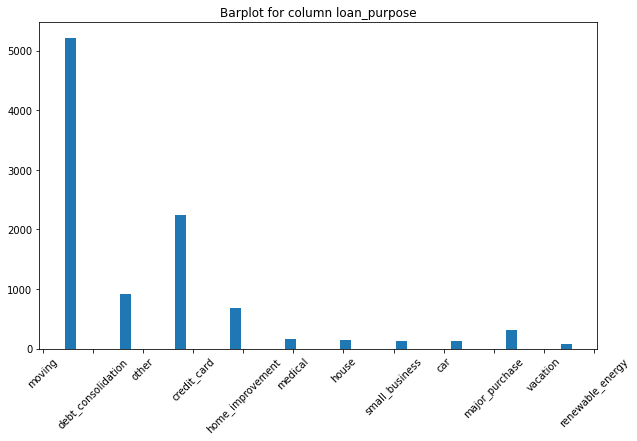

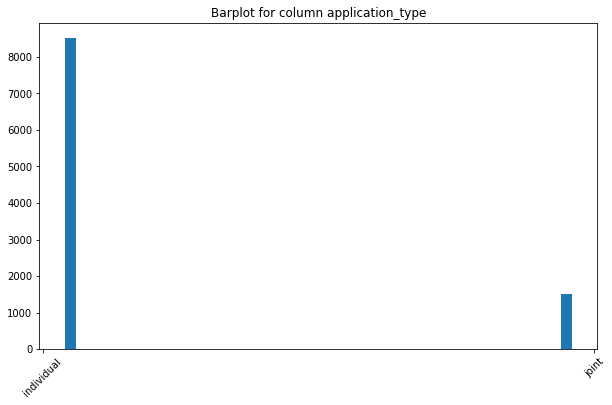

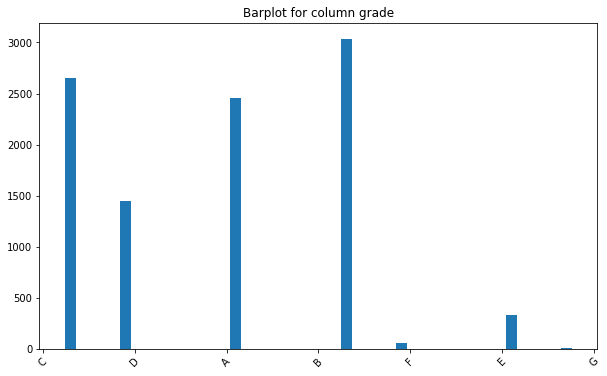

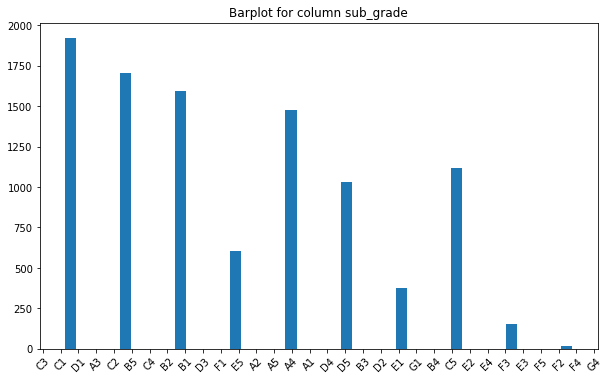

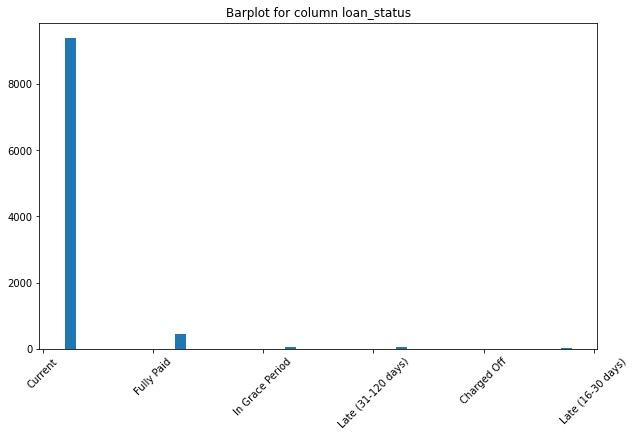

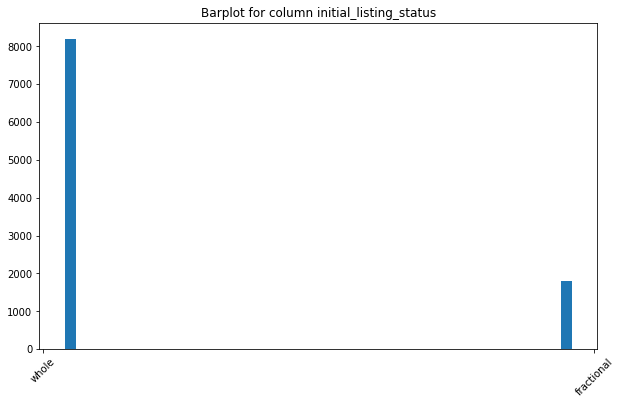

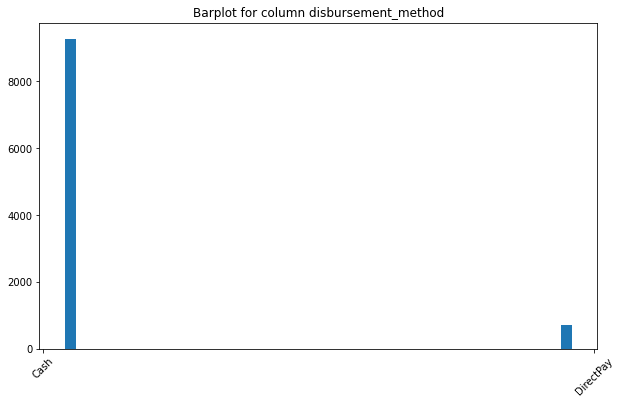

In [98]:
for col in categorical[1:]:
    plt.figure(figsize=[10,6])
    plt.hist(x=df1[col], histtype='bar',rwidth=0.2)
    plt.xticks(rotation=45)
    plt.title(f"Barplot for column {col}")
    plt.show()

### Comments:
- Seems that in numerical variables there are some possible outliers but for now we will keep them in the dataset
- Categorical Data last two columns might be easily modeled as binary variables. 
- For the modelling process I chose to leave outside the categorical variables.
- If i had more time i would run also ML models using as inputs categorical data as binary variables or dummy variables.

In [66]:
df1.describe()

emp_length  annual_income  debt_to_income    delinq_2y  \
count  9183.000000   1.000000e+04     9976.000000  10000.00000   
mean      5.930306   7.922215e+04       19.308192      0.21600   
std       3.703734   6.473429e+04       15.004851      0.68366   
min       0.000000   0.000000e+00        0.000000      0.00000   
25%       2.000000   4.500000e+04       11.057500      0.00000   
50%       6.000000   6.500000e+04       17.570000      0.00000   
75%      10.000000   9.500000e+04       25.002500      0.00000   
max      10.000000   2.300000e+06      469.090000     13.00000   

       earliest_credit_line  inquiries_last_12m  total_credit_lines  \
count           10000.00000         10000.00000        10000.000000   
mean             2001.29000             1.95820           22.679600   
std                 7.79551             2.38013           11.885439   
min              1963.00000             0.00000            2.000000   
25%              1997.00000             0.00000           14.000000   
50%              2003.00000             1.00000           21.000000   
75%              2006.00000             3.00000           29.000000   
max              2015.00000            29.00000           87.000000   

       open_credit_lines  total_credit_limit  total_credit_utilized  \
count        10000.00000        1.000000e+04           10000.000000   
mean            11.40440        1.836062e+05           51049.063100   
std              5.86828        1.876327e+05           53636.731172   
min              0.00000        0.000000e+00               0.000000   
25%              7.00000        5.159375e+04           19185.500000   
50%             10.00000        1.146670e+05           36927.000000   
75%             14.00000        2.675500e+05           65421.000000   
max             51.00000        3.386034e+06          942456.000000   

       num_collections_last_12m  num_historical_failed_to_pay  \
count              10000.000000                  10000.000000   
mean                   0.013800                      0.167100   
std                    0.126535                      0.687768   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.000000                      0.000000   
max                    3.000000                     52.000000   

       current_accounts_delinq  total_collection_amount_ever  \
count               10000.0000                  10000.000000   
mean                    0.0001                    184.334000   
std                     0.0100                   2206.389859   
min                     0.0000                      0.000000   
25%                     0.0000                      0.000000   
50%                     0.0000                      0.000000   
75%                     0.0000                      0.000000   
max                     1.0000                 199308.000000   

       current_installment_accounts  accounts_opened_24m  \
count                  10000.000000         10000.000000   
mean                       2.663600             4.376100   
std                        2.935387             3.158583   
min                        0.000000             0.000000   
25%                        1.000000             2.000000   
50%                        2.000000             4.000000   
75%                        3.000000             6.000000   
max                       35.000000            29.000000   

       months_since_last_credit_inquiry  num_satisfactory_accounts  \
count                       8729.000000               10000.000000   
mean                           7.340703                  11.379600   
std                            5.981590                   5.859705   
min                            0.000000                   0.000000   
25%                            2.000000                   7.000000   
50%      

# Visualizations

## 1 Loan purpose per loan amount

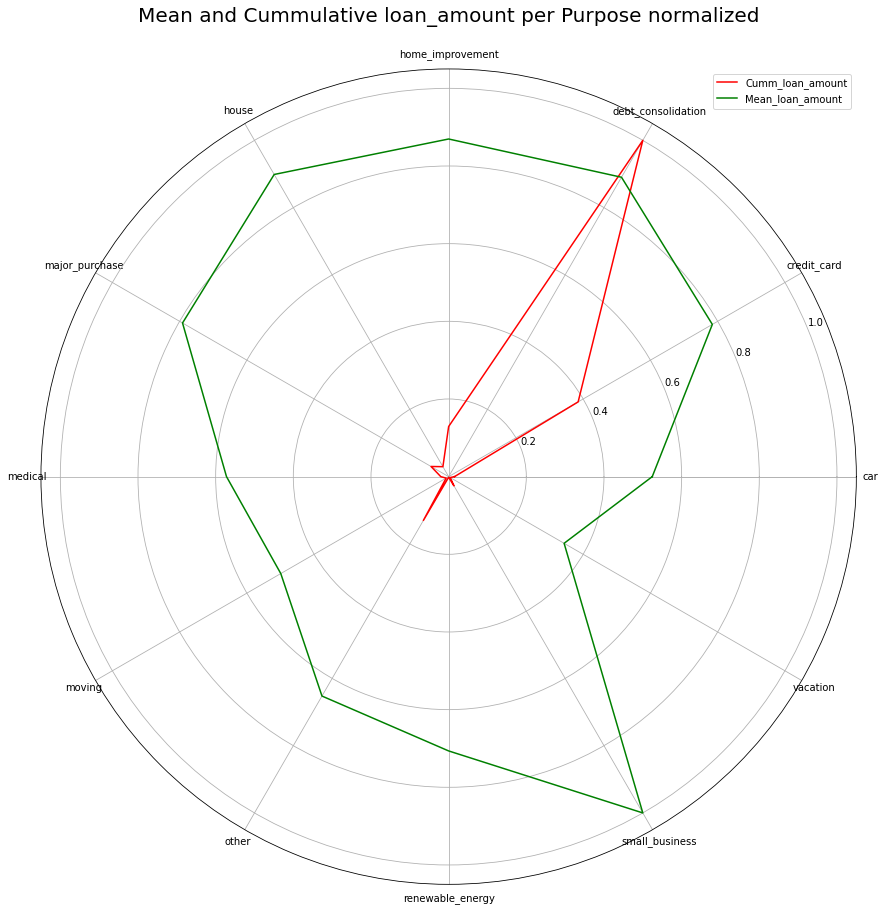

In [42]:
temp = df1.groupby('loan_purpose')
categories = np.unique(df1['loan_purpose'])

loans_mean = []
loans_total = []

for cat in categories:
    loans_mean.append(temp.get_group(cat)['loan_amount'].mean())
    loans_total.append(temp.get_group(cat)['loan_amount'].sum())

loans_mean = [*list(loans_mean), loans_mean[0]]
loans_total = [*list(loans_total), loans_total[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=len(loans_mean))
plt.figure(figsize=(15,15))
plt.subplot(polar=True)
plt.plot( label_loc, loans_total/np.max(loans_total), label = 'Cumm_loan_amount', color='red')
plt.plot( label_loc, loans_mean/np.max(loans_mean), label = 'Mean_loan_amount', color='green')

lines, labels = plt.thetagrids(np.degrees(label_loc), labels= np.append(categories,""))
plt.title("Mean and Cummulative loan_amount per Purpose normalized", size=20, y=1.05)
plt.legend()
plt.show()

### **Comment:**

- The results are normalized.
- The highest mean loan ammount is the one for small businesses and the smallest for vacation.
- The red line shows that the most of the ammount of loan is used for debt consolidation and credit cards and that vacation and the rest are a small proportion of the total money. 

## 2 Loan purpose per loan amount

In [81]:
temp = df1.groupby('earliest_credit_line')
years = np.unique(df1['earliest_credit_line'])
grades = np.unique(df1.grade)
As = []
Bs = []
Cs = []
Ds = []
Es = []
Fs = []
for year in years:
    As.append(np.sum([temp.get_group(year)['grade']=='A']))
    Bs.append(np.sum([temp.get_group(year)['grade']=='B']))
    Cs.append(np.sum([temp.get_group(year)['grade']=='C']))
    Ds.append(np.sum([temp.get_group(year)['grade']=='D']))
    Es.append(np.sum([temp.get_group(year)['grade']=='E']))
    Fs.append(np.sum([temp.get_group(year)['grade']=='F']))

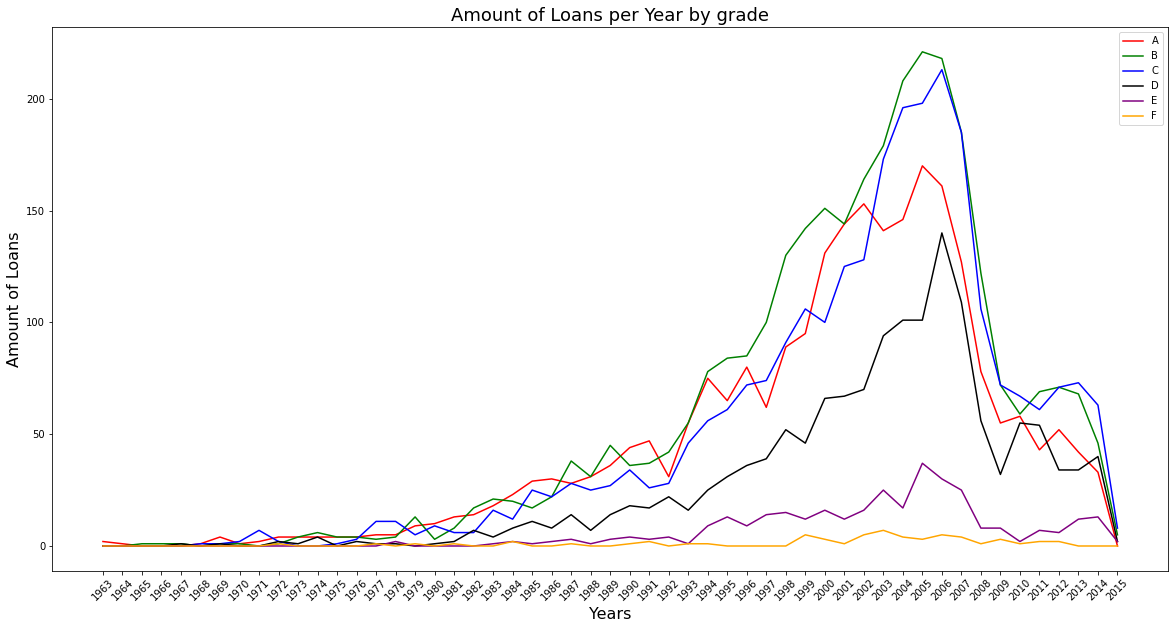

In [97]:
grad = [As, Bs, Cs, Ds, Es, Fs]
colors = ['red','green', 'blue', 'black', 'purple', 'orange']
plt.figure(figsize=[20,10])
for i,g in enumerate(grad):
    plt.plot(years, g, color = colors[i], label=grades[i])
plt.xticks(years, rotation=45)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Amount of Loans", fontsize=16)
plt.title("Amount of Loans per Year by grade", fontsize=18)
plt.legend()
plt.show()

### **Comment:**

- There has been an increase in loans until 2007-2008 and then there is a decrease. 
- The highest ammount of loans is the one with grades B, C and then A.



## 3 Verified Income vs Amount of loan and homeowneship

In [7]:
import plotly.express as px
p = px.box(df1, x='loan_amount', y='verified_income', color='homeownership', title='Verified income vs amount of loan by homeowneship')
p.show()

### **Comment:**
- There is an increase of the ammount of loan when the person is verified and most of the times in homeownership of Mortgage

## 4 Verification Income and Annual income by grade

In [8]:
g4 = px.box(df1.sort_values('grade'), y='annual_income',x='verified_income', color='grade', title='Verification Income vs Annual income colored by grade')
g4.show()

## 5 Earliest credit line and loan ammount colored by loan purpose

In [9]:
g5 = px.bar(df1.sort_values('earliest_credit_line'), x='earliest_credit_line', y ='loan_amount', color='loan_purpose',
title = "Earliest credit line vs loan amount by loan purpose")
g5.show()

### **Comment:**
- We may see that the most loan amount is the one of debt consolidation.
- The Loan ammount has reached in year 2014 the amount of 1990.

## 6 Annual Income and paid late fees by grade

In [10]:
g6 = px.scatter(df1.sort_values('grade'), x='annual_income', y ='paid_late_fees',  facet_col='grade')
g6.show()

## 7 Loan Amount and paid late fees by grade

In [11]:
g7 = px.scatter(df1.sort_values('grade'), x='loan_amount', y ='paid_late_fees',  facet_col='grade')
g7.show()

### 8 Annual Income and paid late fees by grade, verified income and colored by loan purpose

In [12]:
g8 = px.scatter(df1.sort_values('grade'), x='annual_income', y ='paid_late_fees',  facet_col='grade', facet_row='verified_income', color='loan_purpose',width=1200, height=900, 
        title='Paid late fees vs annual income by grade and verification income colored by loan purpose')
g8.show()

## 9 Average annual income sized by loan ammount per years

In [13]:
temp = df1.groupby('earliest_credit_line')
years = np.unique(df1['earliest_credit_line'])

In [14]:
means_income = []
means_loan = []
for year in years:
    means_income.append(temp.get_group(year)['annual_income'].mean())
    means_loan.append(temp.get_group(year)['loan_amount'].mean())

In [15]:
d = pd.DataFrame([years,means_income,means_loan ]).T
d.columns=['years','means_income','means_loan' ]
fig = px.scatter(d,x='years',
                     y='means_income',
                     size='means_loan', 
                     title="Average annual income sized by loan ammount per years")

In [16]:
fig.show()

# Part II Modelling

Before modelling lets check the correlations again



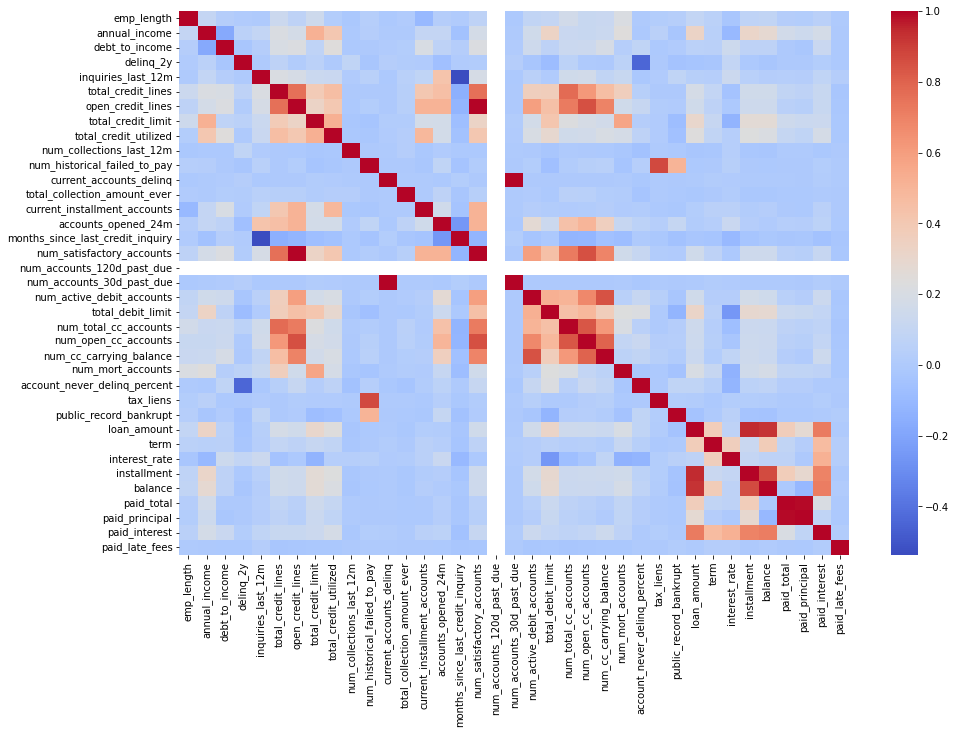

In [18]:
print("Before modelling lets check the correlations again\n")
plt.figure(figsize=[15,10])
sns.heatmap(df1[numerical].corr(), cmap='coolwarm')
plt.show()
# ['total_debit_limit' 'term' 'balance' 'paid_principal' 'paid_interest'] checking for correlations

### **ML Framework**

1. Get the row data.
2. Examine and Preprocess and scale.
3. Feature Selection through LASSO Feature Ranking and Random Forest Variable Importance employing the Recursive Feature Elimination Algorithm.
4. Train 2-3 subset selections using multiple ML algorithms,employing gridsearch technique, cross validation and tuning hyperparameters. 
5. Evaluate using R2 and Mean Absolute Error metrics.
6. Choose the best model. 

- The train-evaluate process has been done through an 10-times iterative process changing the train-test sets proportionated 70%-30%.
- When we keep only 1 time a part of our data as unknown we might get slightly biased better or worse results. Thus, through the iterative
process we have the opportunity to select wisely the best hyperparameters throughout the dataset and the averaged results.

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

features = df1[numerical].drop(columns='interest_rate')
target = df1['interest_rate']

### Data imputation using the mean value

In [220]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(features)

In [222]:
features = pd.DataFrame(x, columns=features.columns.to_list())
features.shape

(10000, 36)

In [242]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.7,random_state=1, shuffle=True)
scaler = StandardScaler()
X_train_sc= pd.DataFrame(scaler.fit_transform(X_train), columns=features.columns.to_list())
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=features.columns.to_list())

model = LassoCV(max_iter=8000)
model.fit(X_train_sc, y_train)


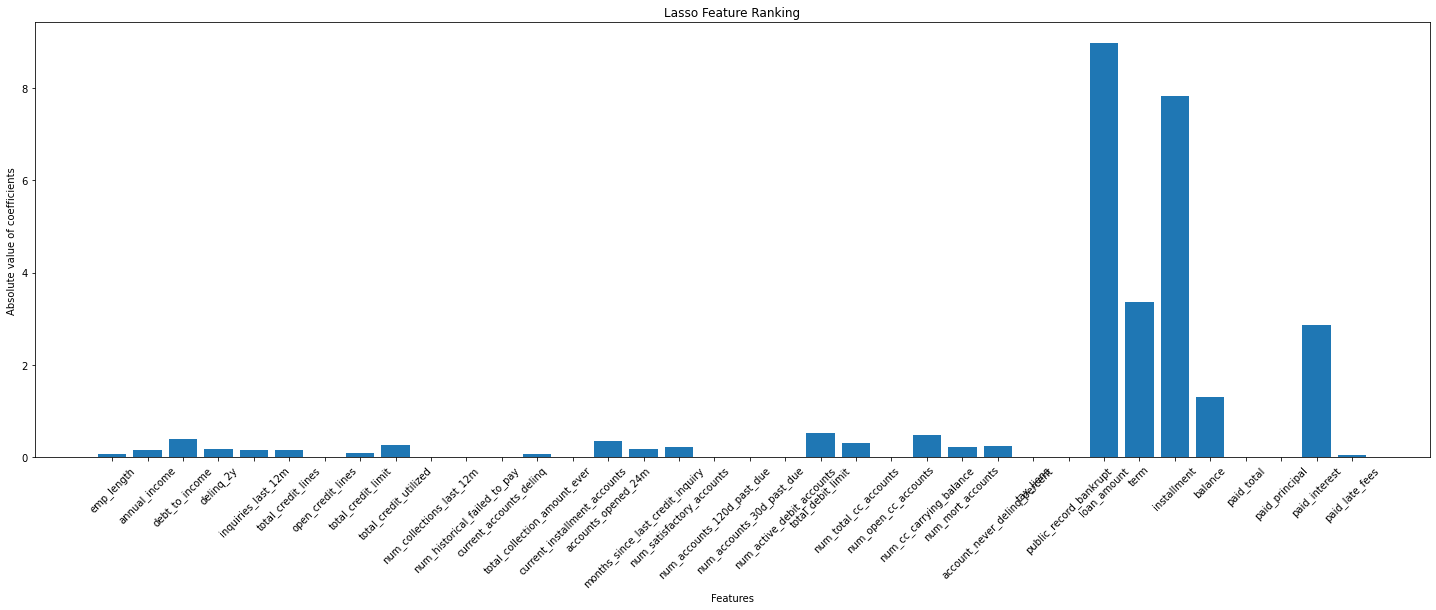

In [236]:
plt.figure(figsize=[25,8])
plt.bar(features.columns.to_list(), np.abs(model.coef_))
plt.title("Lasso Feature Ranking")
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Absolute value of coefficients")
plt.show()

#### **Comment:**
- Lasso seems to find 5 high ranking features but the lasso R2 result is 65%.

### Recursive Feature Elimination

Optimal number of features : 5
Features: ['total_debit_limit' 'term' 'balance' 'paid_principal' 'paid_interest']
Ranking: [19  5  2 24 17  9 23  7 10 28 25 30 22 20 14  8 21 32 31 11  1 13 16 15
 18 12 27 26  3  1  4  1  6  1  1 29]


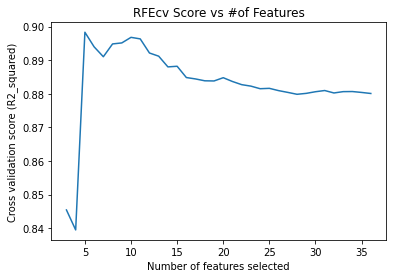

In [244]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
min_features_to_select=3
estimator = RandomForestRegressor(n_estimators=50, random_state=1, n_jobs=-1)
rfecv_d = {}

rfecv = RFECV(estimator, step=1, cv=10, scoring='r2', min_features_to_select=min_features_to_select, n_jobs=-1)
rfecv = rfecv.fit(X_train_sc , y_train)
    
print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Features: {rfecv.get_feature_names_out()}")
print(f"Ranking: {rfecv.ranking_}")
rfecv_d['rfecv'+str(i+1)] = rfecv
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2_squared)")
plt.title(f"RFEcv Score vs #of Features")
plt.plot(
        range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
        rfecv.cv_results_['mean_test_score'],
    )
plt.show()

In [246]:
selection = ['total_debit_limit', 'term', 'balance', 'paid_principal', 'paid_interest']

## We will keep the 5 features for training
*['total_debit_limit', 'term', 'balance', 'paid_principal', 'paid_interest']*

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
def train(data,target, model, params, features):

    results_grid = {}
    results_test_r2 = []
    results_test_mae = []
    for i in range(10):
        print(f"---------- Iteration {i+1} ---------")
        X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size=0.3, shuffle=True, random_state=i )
        scaler = StandardScaler()
        X_train_sc = X_train
        X_test_sc = X_test
        X_train_sc[features] = scaler.fit_transform(X_train[features])
        X_test_sc[features] = scaler.transform(X_test[features])
        grid = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=10, n_jobs=-1, return_train_score=True) #refit=True,
        grid.fit(X_train_sc[features], y_train)
        results_grid['grid'+str(i+1)] = grid
        results_test_r2.append(r2_score(y_test, grid.best_estimator_.predict(X_test_sc[features])))
        results_test_mae.append(mean_absolute_error(y_test, grid.best_estimator_.predict(X_test_sc[features])))
    
    return results_grid, results_test_r2, results_test_mae

## Gradient Boosting Trees Regression

In [254]:
from sklearn.ensemble import GradientBoostingRegressor
paramgrad = {
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [3], 
    'validation_fraction':[0.1], 
    'n_iter_no_change': [6], 
    'tol': [0.001]
}

n=800
grad = GradientBoostingRegressor(n_estimators=n, random_state=1)
r_gridgrad, r_testgrad_r2, r_testgrad_mae  = train(data=features,target=target, model=grad, params=paramgrad, features=selection)

---------- Iteration 1 ---------
---------- Iteration 2 ---------
---------- Iteration 3 ---------
---------- Iteration 4 ---------
---------- Iteration 5 ---------
---------- Iteration 6 ---------
---------- Iteration 7 ---------
---------- Iteration 8 ---------
---------- Iteration 9 ---------
---------- Iteration 10 ---------


In [255]:
for i in range(1,11):
    print(f"Best Gradient Boosting Model: {r_gridgrad['grid'+str(i)].best_estimator_.n_estimators_} (lr:{r_gridgrad['grid'+str(i)].best_estimator_.learning_rate}) with cv r2_score : {r_gridgrad['grid'+str(i)].best_score_} and test score {r_testgrad_r2[i-1]}  and MAE: {r_testgrad_mae[i-1]}")   

Best Gradient Boosting Model: 270 (lr:0.1) with cv r2_score : 0.9108333972477529 and test score 0.9212219069581489  and MAE: 0.7941986390873826
Best Gradient Boosting Model: 210 (lr:0.1) with cv r2_score : 0.9123080767873997 and test score 0.9086768725130911  and MAE: 0.8681547284107669
Best Gradient Boosting Model: 442 (lr:0.05) with cv r2_score : 0.9079501465483191 and test score 0.9180245556016484  and MAE: 0.8598601371202977
Best Gradient Boosting Model: 413 (lr:0.05) with cv r2_score : 0.9106707393771588 and test score 0.9147530745262444  and MAE: 0.8747702436214837
Best Gradient Boosting Model: 201 (lr:0.1) with cv r2_score : 0.9188982517152423 and test score 0.898159415320249  and MAE: 0.8741609406823786
Best Gradient Boosting Model: 184 (lr:0.1) with cv r2_score : 0.912098048307425 and test score 0.9134263258071836  and MAE: 0.894612422092856
Best Gradient Boosting Model: 185 (lr:0.1) with cv r2_score : 0.9082586927486483 and test score 0.8994139580883712  and MAE: 0.9063402890

## KNN Regression

In [257]:
from sklearn.neighbors import KNeighborsRegressor
paramknn = {
    'n_neighbors': [3,5,7,9,11,13,15,17,20]
}
knn = KNeighborsRegressor( )
r_gridknn, r_testknn_r2, r_testknn_mae  = train(data=features,target=target, model=knn, params=paramknn, features=selection)

---------- Iteration 1 ---------
---------- Iteration 2 ---------
---------- Iteration 3 ---------
---------- Iteration 4 ---------
---------- Iteration 5 ---------
---------- Iteration 6 ---------
---------- Iteration 7 ---------
---------- Iteration 8 ---------
---------- Iteration 9 ---------
---------- Iteration 10 ---------


In [259]:
for i in range(1,11):
    print(f"Best k-NN Model: {r_gridknn['grid'+str(i)].best_estimator_.n_neighbors} with cv r2_score : {r_gridknn['grid'+str(i)].best_score_} and test score {r_testknn_r2[i-1]}  and MAE: {r_testknn_mae[i-1]}")   

Best k-NN Model: 5 with cv r2_score : 0.73958358233028 and test score 0.7471931765859229  and MAE: 1.7149020000000001
Best k-NN Model: 5 with cv r2_score : 0.7288782901216555 and test score 0.7282771117390949  and MAE: 1.775236666666667
Best k-NN Model: 5 with cv r2_score : 0.733850001247048 and test score 0.7266090711240196  and MAE: 1.7884813333333334
Best k-NN Model: 5 with cv r2_score : 0.723866331923219 and test score 0.7430928424949632  and MAE: 1.7411473333333334
Best k-NN Model: 5 with cv r2_score : 0.7419180524496737 and test score 0.7259042230710453  and MAE: 1.7218859999999998
Best k-NN Model: 5 with cv r2_score : 0.7339670049837369 and test score 0.7378981667748856  and MAE: 1.772358666666667
Best k-NN Model: 5 with cv r2_score : 0.7362908814163486 and test score 0.7418448675450819  and MAE: 1.7351686666666668
Best k-NN Model: 5 with cv r2_score : 0.7352352089776962 and test score 0.7314294650233474  and MAE: 1.7945613333333335
Best k-NN Model: 5 with cv r2_score : 0.726838

## Simple Linear Regression

In [265]:
from sklearn.linear_model import LinearRegression

param = {
    'normalize':[True, False]
}
linear = LinearRegression()
r_gridlinear, r_testlinear_r2, r_testlinear_mae  = train(data=features,target=target, model=linear,params=param, features=selection)

In [267]:
for i in range(1,11):
    print(f"Best Linear Regression Model: {r_gridlinear['grid'+str(i)].best_estimator_.normalize} with cv r2_score : {r_gridlinear['grid'+str(i)].best_score_} and test score {r_testlinear_r2[i-1]}  and MAE: {r_testlinear_mae[i-1]}")

Best Linear Regression Model: True with cv r2_score : 0.5125018393970701 and test score 0.5293965159314014  and MAE: 2.6459669398528303
Best Linear Regression Model: True with cv r2_score : 0.5269387426459102 and test score 0.49749155700546077  and MAE: 2.715633366761664
Best Linear Regression Model: True with cv r2_score : 0.5282835988692547 and test score 0.4949012335420404  and MAE: 2.740997331804787
Best Linear Regression Model: True with cv r2_score : 0.5158457388586235 and test score 0.518242167057833  and MAE: 2.6985587599685275
Best Linear Regression Model: True with cv r2_score : 0.5254224553998834 and test score 0.4920299067389321  and MAE: 2.651672573266955
Best Linear Regression Model: True with cv r2_score : 0.5211647484655421 and test score 0.5119104039822177  and MAE: 2.721562593648201
Best Linear Regression Model: True with cv r2_score : 0.5239331098119663 and test score 0.5043840187199012  and MAE: 2.718199418632669
Best Linear Regression Model: True with cv r2_score :

## Support Vector Regression

In [269]:
from sklearn.svm import SVR

svr_param = {'C': [0.01, 0.1, 1,5]}

svr = SVR(kernel='rbf')
r_gridsvr, r_testsvr_r2, r_testsvr_mae  = train(data=features,target=target, model=svr, params=svr_param, features=selection)

---------- Iteration 1 ---------
---------- Iteration 2 ---------
---------- Iteration 3 ---------
---------- Iteration 4 ---------
---------- Iteration 5 ---------
---------- Iteration 6 ---------
---------- Iteration 7 ---------
---------- Iteration 8 ---------
---------- Iteration 9 ---------
---------- Iteration 10 ---------


In [270]:
for i in range(1,11):
    print(f"Best SVR Model: {r_gridsvr['grid'+str(i)].best_estimator_.C} with cv r2_score : {r_gridsvr['grid'+str(i)].best_score_} and test score {r_testsvr_r2[i-1]}  and MAE: {r_testsvr_mae[i-1]}")   

Best SVR Model: 5 with cv r2_score : 0.7965022007028297 and test score 0.8148009401410531  and MAE: 1.2134184536717223
Best SVR Model: 5 with cv r2_score : 0.795648048332627 and test score 0.7955029910684444  and MAE: 1.2628768207788577
Best SVR Model: 5 with cv r2_score : 0.7992982522523049 and test score 0.8008204350723334  and MAE: 1.2805322891700517
Best SVR Model: 5 with cv r2_score : 0.7948407546584483 and test score 0.8021352483435849  and MAE: 1.246915300295673
Best SVR Model: 5 with cv r2_score : 0.8057755282482633 and test score 0.7859471005788611  and MAE: 1.2491286870573697
Best SVR Model: 5 with cv r2_score : 0.7990410672669016 and test score 0.8035395386250281  and MAE: 1.277444831914914
Best SVR Model: 5 with cv r2_score : 0.802037193545931 and test score 0.7905157858421213  and MAE: 1.2742469076349383
Best SVR Model: 5 with cv r2_score : 0.7962050656179113 and test score 0.8053318397681245  and MAE: 1.2397011635866242
Best SVR Model: 5 with cv r2_score : 0.7970688195132

### Attempting training  by transforming the value of target variable
- We change the target variable to log or log+1 and inverse transform it 

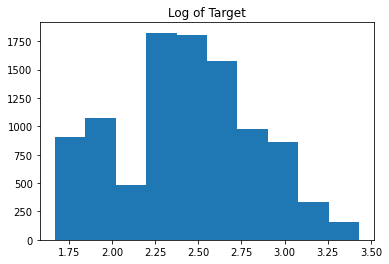

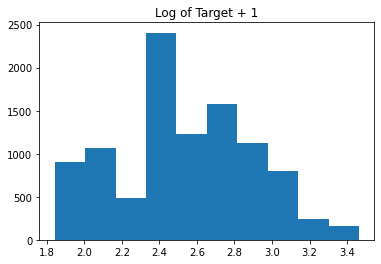

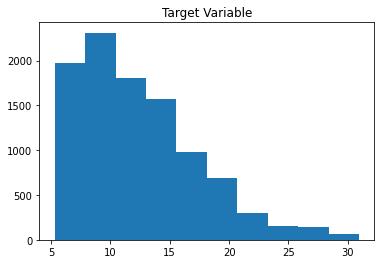

In [26]:
plt.hist(np.log(target))
plt.title("Log of Target")
plt.show()
plt.hist(np.log1p(target))
plt.title("Log of Target + 1")
plt.show()
plt.hist(target)
plt.title("Target Variable")
plt.show()


In [283]:
def train2(data,target, model, params, features):

    results_grid = {}
    results_test_r2 = []
    results_test_mae = []
    for i in range(10):
        print(f"---------- Iteration {i+1} ---------")
        X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size=0.3, shuffle=True, random_state=i )
        scaler = StandardScaler()
        X_train_sc = X_train
        X_test_sc = X_test
        X_train_sc[features] = scaler.fit_transform(X_train[features])
        X_test_sc[features] = scaler.transform(X_test[features])

        y_train  = np.log1p(y_train)
        # y_test = np.log(y_test)
        grid = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=10, n_jobs=-1, return_train_score=True) #refit=True,
        grid.fit(X_train_sc[features], y_train)
        results_grid['grid'+str(i+1)] = grid
        results_test_r2.append(r2_score(y_test, np.expm1(grid.best_estimator_.predict(X_test_sc[features]))))
        results_test_mae.append(mean_absolute_error(y_test, np.expm1(grid.best_estimator_.predict(X_test_sc[features]))))
    
    return results_grid, results_test_r2, results_test_mae

### Gradient Boosting Tree Regression (target = log(target))

In [284]:
paramgrad = {
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [3], 
    'validation_fraction':[0.1], 
    'n_iter_no_change': [6], 
    'tol': [0.001]
}

n=800
grad2 = GradientBoostingRegressor(n_estimators=n, random_state=1)
r1, r_test_r2, r_test_mae  = train2(data=features,target=target, model=grad2, params=paramgrad, features=selection)

---------- Iteration 1 ---------
---------- Iteration 2 ---------
---------- Iteration 3 ---------
---------- Iteration 4 ---------
---------- Iteration 5 ---------
---------- Iteration 6 ---------
---------- Iteration 7 ---------
---------- Iteration 8 ---------
---------- Iteration 9 ---------
---------- Iteration 10 ---------


In [282]:
#log -> exp
for i in range(1,11):
    print(f"Best Gradient Boosting Model: {r1['grid'+str(i)].best_estimator_.n_estimators_} (lr:{r1['grid'+str(i)].best_estimator_.learning_rate}) with cv r2_score : {r1['grid'+str(i)].best_score_} and test score {r_test_r2[i-1]}  and MAE: {r_test_mae[i-1]}")  

Best Gradient Boosting Model: 75 (lr:0.1) with cv r2_score : 0.8699340491082923 and test score 0.8568059634594224  and MAE: 1.2673040908407325
Best Gradient Boosting Model: 83 (lr:0.1) with cv r2_score : 0.8759062757533809 and test score 0.8529490841524511  and MAE: 1.2357762827404206
Best Gradient Boosting Model: 80 (lr:0.1) with cv r2_score : 0.8697132417171426 and test score 0.8594423911227363  and MAE: 1.2661294510475063
Best Gradient Boosting Model: 83 (lr:0.1) with cv r2_score : 0.8704743551107409 and test score 0.858849919175588  and MAE: 1.224466514336743
Best Gradient Boosting Model: 81 (lr:0.1) with cv r2_score : 0.8842488286257483 and test score 0.8459070002408358  and MAE: 1.2064805583243083
Best Gradient Boosting Model: 80 (lr:0.1) with cv r2_score : 0.8688564360656903 and test score 0.8584727142016021  and MAE: 1.2469470634512585
Best Gradient Boosting Model: 83 (lr:0.1) with cv r2_score : 0.8693999788338213 and test score 0.8514837650151206  and MAE: 1.2195513999564425
B

### Gradient Boosting Tree Regression (target = log(target+1))

In [286]:
#log1p - expm1
for i in range(1,11):
    print(f"Best Gradient Boosting Model: {r1['grid'+str(i)].best_estimator_.n_estimators_} (lr:{r1['grid'+str(i)].best_estimator_.learning_rate}) with cv r2_score : {r1['grid'+str(i)].best_score_} and test score {r_test_r2[i-1]}  and MAE: {r_test_mae[i-1]}")  

Best Gradient Boosting Model: 72 (lr:0.1) with cv r2_score : 0.8656073461183403 and test score 0.851237220677544  and MAE: 1.3031870353413597
Best Gradient Boosting Model: 72 (lr:0.1) with cv r2_score : 0.8697429046413676 and test score 0.8386326505851676  and MAE: 1.3220376063733144
Best Gradient Boosting Model: 79 (lr:0.1) with cv r2_score : 0.8640433006354522 and test score 0.8571381143051612  and MAE: 1.2900837139086936
Best Gradient Boosting Model: 77 (lr:0.1) with cv r2_score : 0.8634055737114389 and test score 0.8498169193294074  and MAE: 1.2836487704038737
Best Gradient Boosting Model: 76 (lr:0.1) with cv r2_score : 0.8745544488448187 and test score 0.8389489842883834  and MAE: 1.2520476054722887
Best Gradient Boosting Model: 75 (lr:0.1) with cv r2_score : 0.8638986577778814 and test score 0.8510928479838381  and MAE: 1.2976874092510438
Best Gradient Boosting Model: 76 (lr:0.1) with cv r2_score : 0.8660016854783678 and test score 0.8435822014775178  and MAE: 1.2683695900107639


# **Conclusions:**

- Our Regression problems seems to have been solved in at an big coefficient of determination and small mean absolute error.
- Gradient Boosting Trees Regressor seems to outperforms the rest models predicting the target variable and not the transformed one.
- Our model achieves an approximately averaged r2_score of 91% and an averaged Mean Absolute Error of 0.85.
- The input variables were 5 ('total_debit_limit', 'term', 'balance', 'paid_principal', 'paid_interest')
- Of course when it is to deliver the best model it has to be fitted on the whole dataset. 

- If i had more time i would have searched better the n_estimators and other parameters of the GBTR models in order to find the best one for the model. 
- Also, Due to the many independent variable i could do a Principal Component Analysis and then fit the model to see of we gain better results.
- Additionally, I would have tried to forward select the best selection possible meaning that maybe 1 or 2 variables might gain better results
 instead of the 5 variables that were selected.

- I assumed that the categorical data after the dummy variable technique might not have any information to give and chose not to employ them at the training process. 
- Moreover, I assumed that the Recursive Feature Elmination with Random Forest Estimator yielded the best possible subset selection, which might not be true. The only way to find out is to try more subsets and evaluate the results. 
 
 - Finally, the abovementioned had as main goal to create a regression model that will generalize on unknown data the best possible but we didn't have actual unknown data. 

In [16]:
!jupyter nbconvert Case-Study_1_NG.ipynb --no-input --to html

[NbConvertApp] Converting notebook Case-Study_1_NG.ipynb to html
[NbConvertApp] Writing 6239583 bytes to Case-Study_1_NG.html
